In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

In [2]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin','comment']

raw_data = pd.read_csv(url, names=column_names,na_values='?',sep='\s+',comment='\t')

In [3]:
raw_data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,comment
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [4]:
raw_data.isnull().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
comment         0
dtype: int64

In [5]:
raw_data.dropna(inplace=True)
data=raw_data.drop(columns=['comment'])

In [6]:
data.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [7]:
data['Origin']=data['Origin'].map({1:'USA',2:'Europe',3:'Japan'})

In [8]:
data=pd.get_dummies(data,columns=['Origin'],prefix='',prefix_sep='')

In [9]:
train_data=data.sample(frac=0.8,random_state=42)
test_data=data.drop(train_data.index)

C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shich\anaconda3\envs\datascience\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

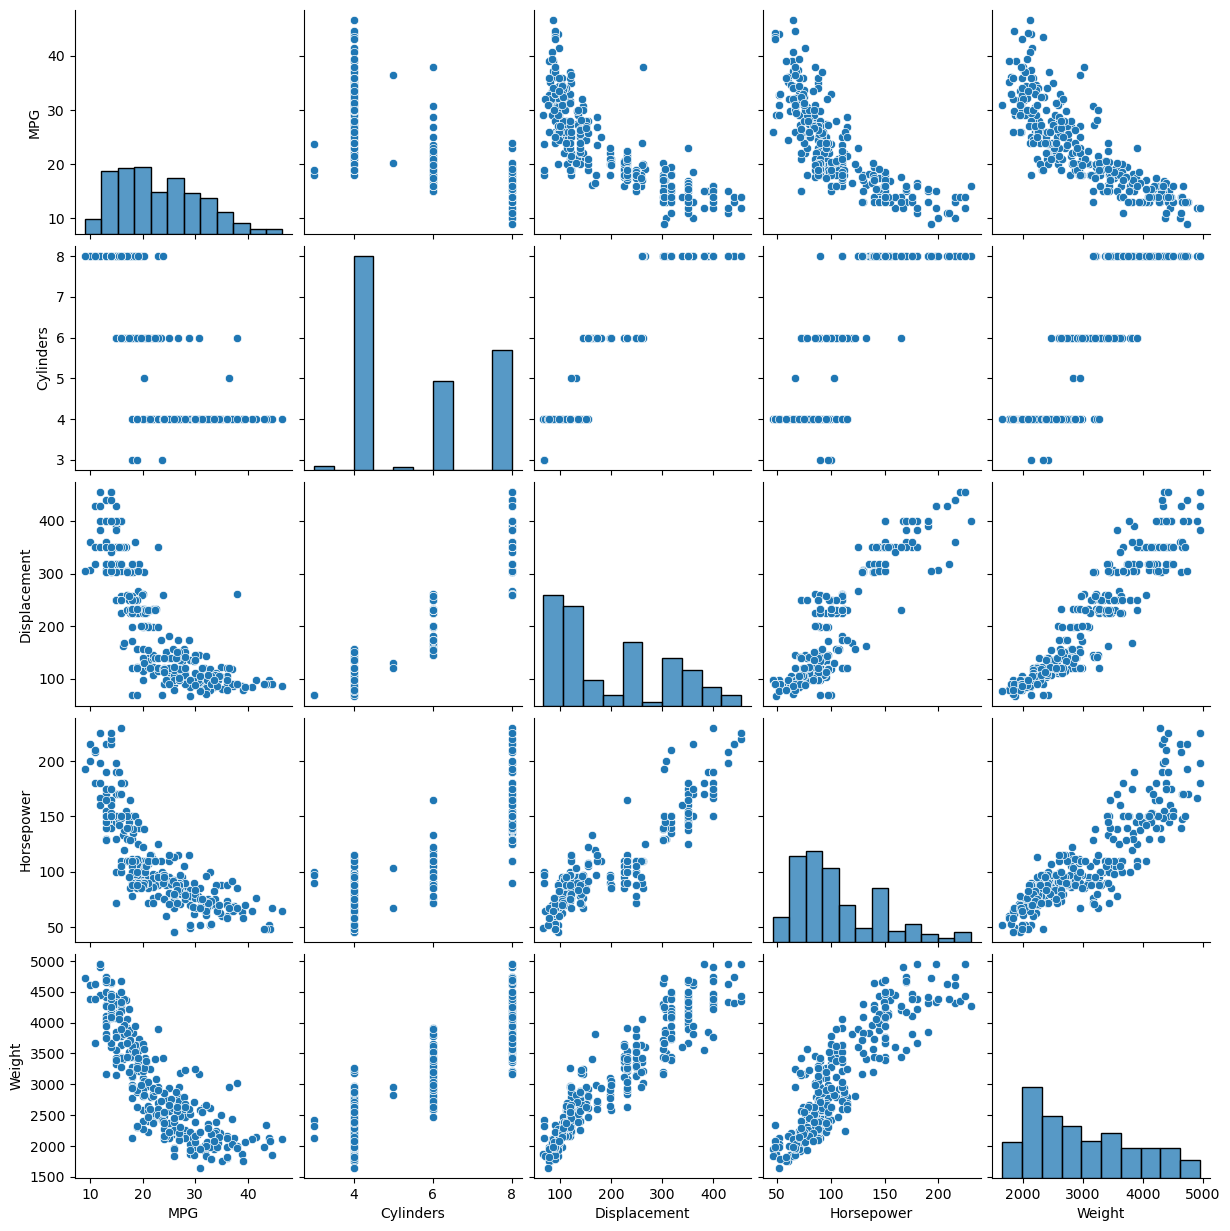

In [10]:
sns.pairplot(train_data[["MPG",'Cylinders','Displacement','Horsepower','Weight']])

In [11]:
train_data.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
count,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.153822,5.531847,197.855096,105.971338,3005.745223,15.510828,75.910828
std,7.861854,1.729449,106.501896,39.636557,859.060925,2.803560,3.688989
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,76.000000,2231.000000,13.625000,73.000000
50%,22.000000,4.000000,151.000000,95.000000,2831.500000,15.500000,76.000000
75%,28.075000,8.000000,302.000000,130.000000,3641.750000,17.000000,79.000000
max,46.600000,8.000000,455.000000,230.000000,4955.000000,24.800000,82.000000


In [12]:
train_features=train_data.copy()
test_features=test_data.copy()
train_labels=train_features.pop('MPG')
test_labels=test_features.pop('MPG')

In [13]:
train_features

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
79,4,96.0,69.0,2189.0,18.0,72,True,False,False
276,4,121.0,115.0,2795.0,15.7,78,True,False,False
248,4,91.0,60.0,1800.0,16.4,78,False,True,False
56,4,91.0,70.0,1955.0,20.5,71,False,False,True
393,4,140.0,86.0,2790.0,15.6,82,False,False,True
...,...,...,...,...,...,...,...,...,...
218,4,79.0,58.0,1825.0,18.6,77,True,False,False
281,6,200.0,85.0,2990.0,18.2,79,False,False,True
342,4,135.0,84.0,2385.0,12.9,81,False,False,True
238,4,98.0,83.0,2075.0,15.9,77,False,False,True


In [44]:
normalizer=tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
model=tf.keras.Sequential([
    normalizer,
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.MeanSquaredError,optimizer='adam')

In [45]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization)      │ ?                           │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19 (80.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 19 (80.00 B)

In [46]:
model.fit(train_features,train_labels,validation_split=0.2,epochs=100,verbose=2)

Epoch 1/100
8/8 - 1s - 119ms/step - loss: 589.2315 - val_loss: 517.8955
Epoch 2/100
8/8 - 0s - 7ms/step - loss: 557.2901 - val_loss: 488.6427
Epoch 3/100
8/8 - 0s - 10ms/step - loss: 521.5019 - val_loss: 455.9648
Epoch 4/100
8/8 - 0s - 6ms/step - loss: 481.6706 - val_loss: 417.0402
Epoch 5/100
8/8 - 0s - 7ms/step - loss: 432.5891 - val_loss: 369.9666
Epoch 6/100
8/8 - 0s - 6ms/step - loss: 373.6952 - val_loss: 313.9575
Epoch 7/100
8/8 - 0s - 7ms/step - loss: 302.1859 - val_loss: 251.9940
Epoch 8/100
8/8 - 0s - 10ms/step - loss: 225.9971 - val_loss: 188.8303
Epoch 9/100
8/8 - 0s - 6ms/step - loss: 154.6720 - val_loss: 133.1935
Epoch 10/100
8/8 - 0s - 6ms/step - loss: 99.1390 - val_loss: 92.8907
Epoch 11/100
8/8 - 0s - 6ms/step - loss: 65.1474 - val_loss: 70.8001
Epoch 12/100
8/8 - 0s - 6ms/step - loss: 50.0973 - val_loss: 59.0604
Epoch 13/100
8/8 - 0s - 10ms/step - loss: 43.7487 - val_loss: 49.5212
Epoch 14/100
8/8 - 0s - 9ms/step - loss: 36.5834 - val_loss: 41.0815
Epoch 15/100
8/8 - 0

In [47]:
model.evaluate(test_features,test_labels)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.6286 


7.066507816314697

In [48]:
predict_labels=model.predict(test_features)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


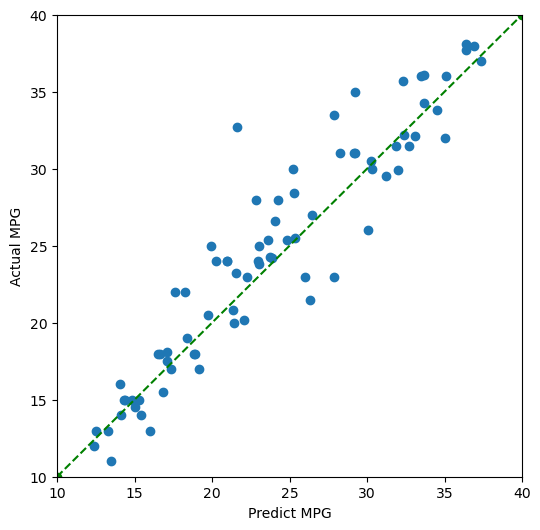

In [49]:
fig=plt.figure(figsize=(6,6))
plt.scatter(predict_labels,test_labels)
plt.xlabel('Predict MPG')
plt.ylabel('Actual MPG')
lims=[10,40]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims,lims,'go--')
plt.show()